<a href="https://colab.research.google.com/github/KushangShah/AlmaBetter-Projects/blob/main/Module%206%20Machine%20Learning/6.1%20CapStone%20ML/Kushang_Airline_ML_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - IndiGo Airline Passenger Referral Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name-** Sahil Bagh

# **Project Summary -**

In the fast-paced and highly competitive airline sector, companies such as IndiGo are constantly working to improve the customer journey and foster long-term loyalty. A key aspect of this initiative involves analyzing and predicting passenger referrals, which greatly impact the airline’s brand reputation and market standing. By examining passenger reviews spanning from 2006 to 2019, IndiGo gains valuable insights into customer perceptions across various aspects of air travel. These reviews serve as a rich source of feedback on elements such as comfort, service quality, and overall value, and play a crucial role in influencing the decisions of prospective travelers.


# **Problem Statement**


By using this big dataset, IndiGo wants to make a model that can guess which passengers will say good things about the airline to others. With this knowledge, IndiGo can:

1.   **Make Customer Experience Better**
    - IndiGo can find out what things make passengers happy and focus on improiving those. This way, passengers will feel more satisfied with the service.

2.   **Fix Important problems**
    - If IndiGo knows why some people don't want to recommend the airline, they can try to fix those issues -- Like making flights more comfortable, giving better service, or offering good prices.

3.   **Better Marketing Plans**
    - When IndiGo understands why people talk good about them, they can make smart advertisements and use good customer stories to make more people like the brand.

4.   **Stay ahead of Others**
    - By always improving their service based on what people say. IndiGo can become better than otther airlines and stay strong in the market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the necessary libraries

# For handling data and doing some calculations
import pandas as pd
import numpy as np

# For visualizing data (making graphs and charts)
import matplotlib.pyplot as plt
import seaborn as sns

# For some basic statistics and tests
import scipy.stats as stats
from scipy.stats import chi2_contingency

# For preparing the data before training models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Machine learning models (the actual algorithms)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import time  # to measure how long things take

# For checking how well the models are doing
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    precision_score,
    recall_score,
    f1_score
)

# For tuning the models to get better performance
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
    learning_curve
)

# To ignore any warnings that pop up
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Load Dataset
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Now, load your dataset using the correct path relative to the mounted drive
# Airline_df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Module 6: Machine Learning/Capstone Project ML/data_airline_reviews.xlsx")


Mounted at /content/drive


In [ ]:
# Load Dataset
Airline_df = pd.read_csv("/content/drive/MyDrive/almabetter/Capstone Project Videos/Module 6/data_airline.csv")

In [ ]:
df = Airline_df.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,May-19,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,May-19,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}")

Number of Duplicate Rows: 70711


In [ ]:
# If there are duplicates, remove them to keep the data clean
df.drop_duplicates(inplace=True)

#Checking the new shape of the dataset after removing duplicates
df.shape

(61184, 17)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

# how many missing values are in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
print()

# check what percentage of the data is missing in each column
missing_percentage = (missing_values / len(df)) * 100
print("Percentage of Missing Values:\n", round(missing_percentage, 2))


Missing Values:
 airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

Percentage of Missing Values:
 airline             0.00
overall             2.91
author              0.00
review_date         0.00
customer_review     0.00
aircraft           69.78
traveller_type     38.64
cabin               4.05
route              38.69
date_flown         38.82
seat_comfort        8.13
cabin_service       8.08
food_bev           20.99
entertainment      34.25
ground_service     39.25
value_for_money     3.04
recommended         2.33
dtype: float64


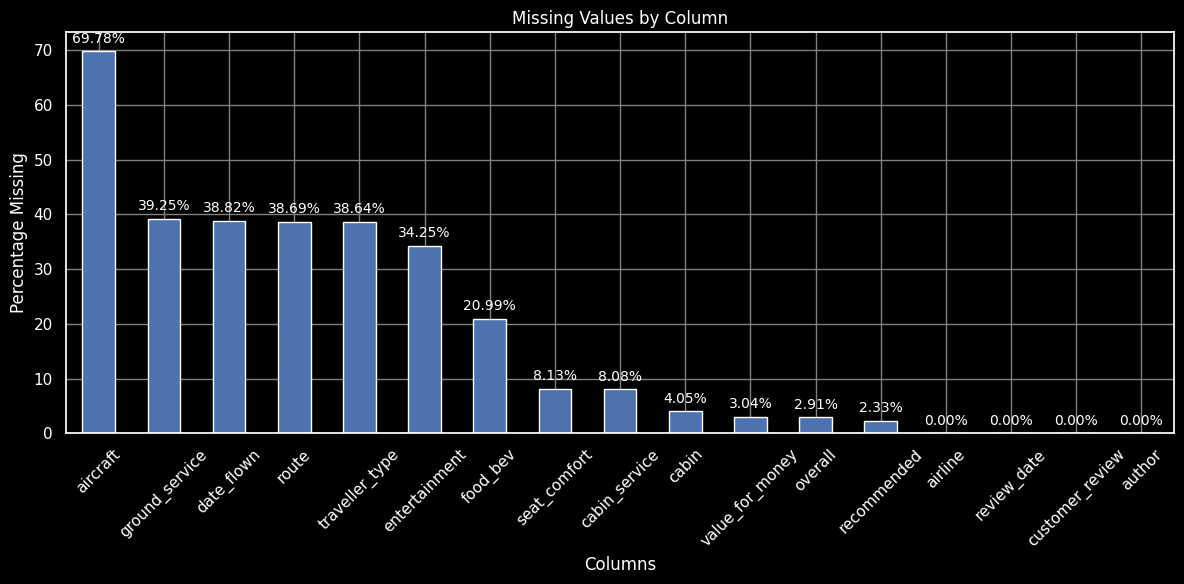

In [ ]:
# Visualizing the missing values
# Calculate missing percentages
missing_percent = df.isnull().mean() * 100

# Plot it
plt.figure(figsize=(12, 6))
ax = missing_percent.sort_values(ascending=False).plot(kind='bar')

# Adding percentage labels on top of each bar
for i, v in enumerate(missing_percent.sort_values(ascending=False)):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=10, color='white')

plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What did you know about your dataset?

- My Airline Reviews dataset has 1,31,895 rows and 17 columns.
- There were 70,711 duplicate rows, and I removed them to keep the data clean.
- In the 'aircraft' column, I found that 69% of the data is missing. That is a lot, so maybe I need to do something about it later.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns


Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().round(2)


,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.00,56211.00,56240.00,48341.00,40230.00,37169.00,59327.00
mean,5.16,2.96,3.20,2.93,2.89,2.68,2.95
std,3.48,1.44,1.57,1.48,1.50,1.61,1.59
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,2.00,2.00,1.00,1.00,1.00,1.00
50%,5.00,3.00,3.00,3.00,3.00,3.00,3.00
75%,9.00,4.00,5.00,4.00,4.00,4.00,4.00
max,10.00,5.00,5.00,5.00,5.00,5.00,5.00


### Variables Description

- airline: Name of the airline company.
- overall: Total score given to the trip (between 1 and 10).
- author: Name of the person who gave the review.
- review_date: Date when the review was written.
- customer_review: Text of the review about the flight.
- aircraft: Type or model of airplane used.
- traveller_type: Type of traveler (like business trip or leisure trip).
- cabin: Which class — like Economy, Business, or First.
- route: The flight route (from where to where).
- date_flown: Date of the actual flight.
- seat_comfort: How comfortable the seat was (rated 1 to 5).
- cabin_service: Service in the cabin (rated 1 to 5).
- food_bev: Food and drink quality (rated 1 to 5).
- entertainment: In-flight entertainment rating (1 to 5).
- ground_service: Service on the ground (check-in, boarding etc.) (rated 1 to 5).
- value_for_money: Is the flight worth the price? (rated 1 to 5).
- recommended: Did the person recommend the airline? (yes or no) — This is the target column.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"{col}: {df[col].unique()}\n")

airline: [nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Air

Answer Here.

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Count of Reviews per Airline

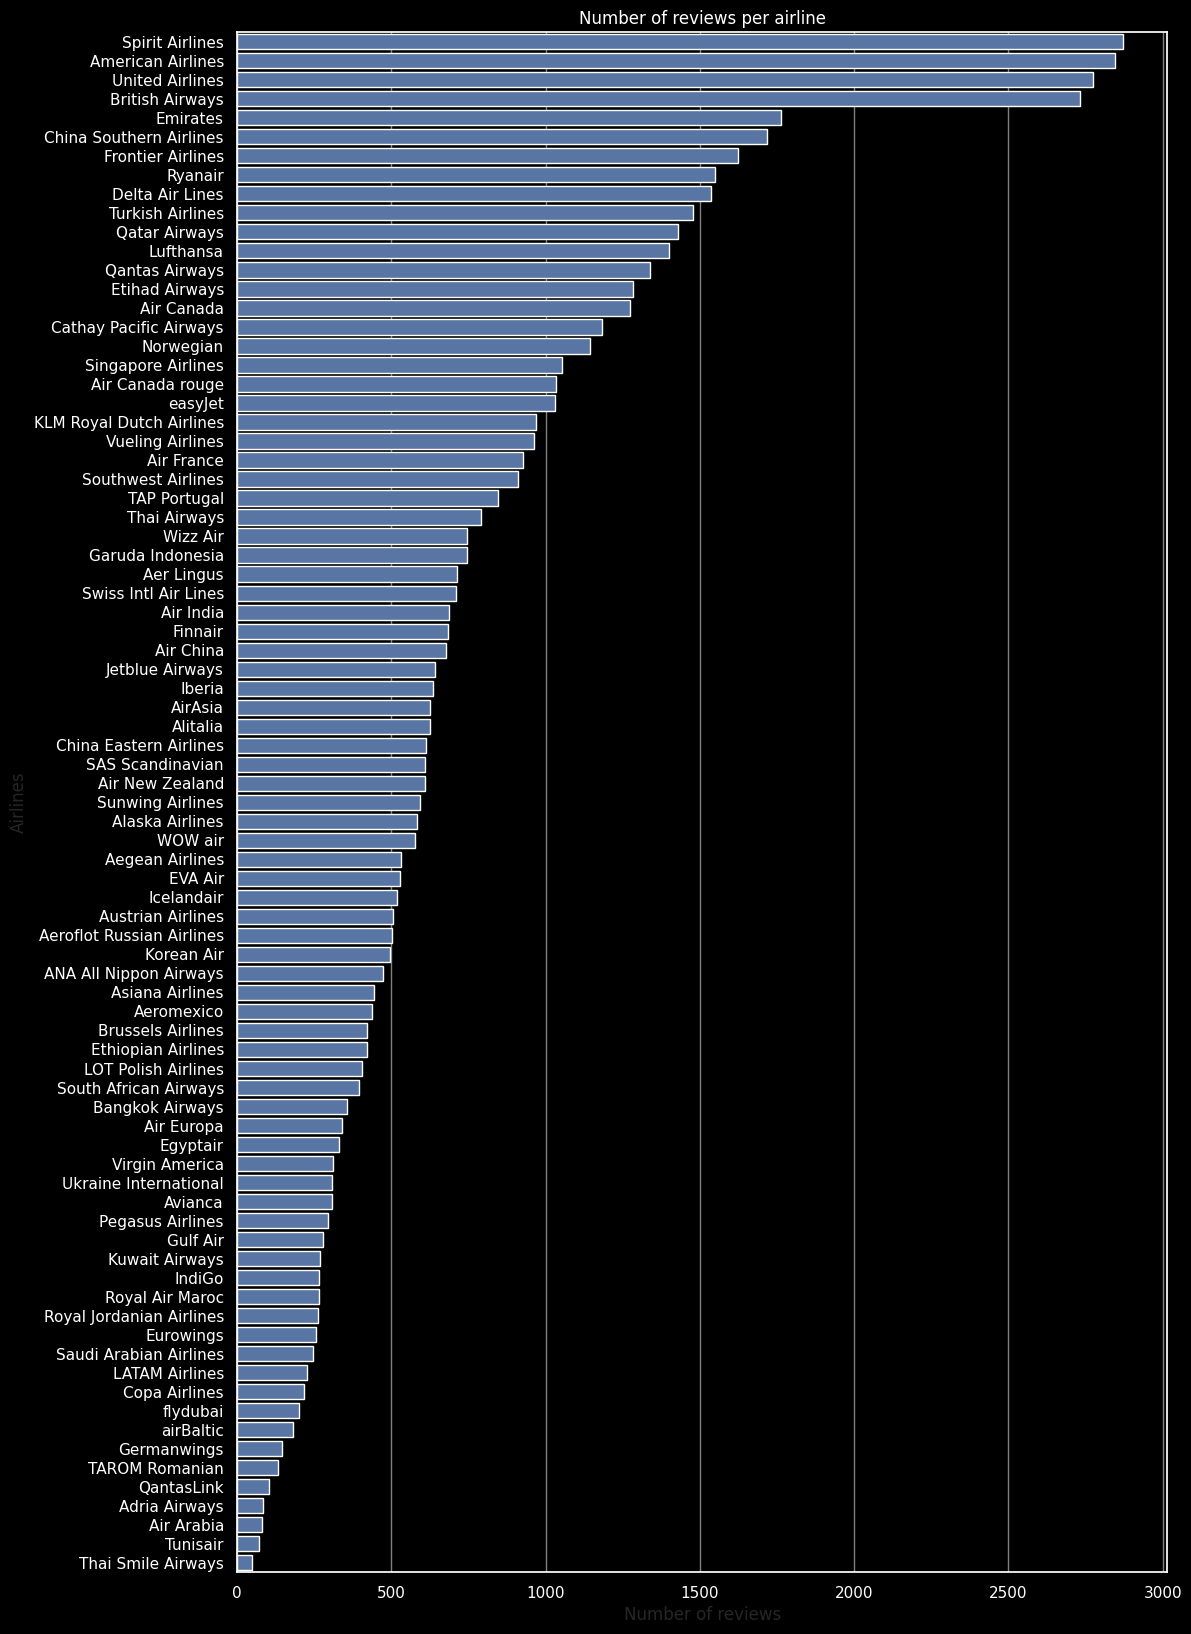

In [ ]:
# Chart - 1 Count of Reviews per Airline
plt.figure(figsize=(12, 20))
sns.countplot(data=df, y='airline', order=df['airline'].value_counts().index)
plt.title("Number of reviews per airline")
plt.xlabel("Number of reviews")
plt.ylabel("Airlines")
plt.show()

##### 1. Why did you pick the specific chart?

I choose this bar chart because it easy to understand which airline got more reviews. Bar chart show airline name and how many people write review for it. It help to see which airline is popular

##### 2. What is/are the insight(s) found from the chart?

We can see American Airlines and United Airlines have most reviews. That mean many people fly with them or care to leave review. Airlines like Copa Airlines and LATAM Airlines have very few reviews. Maybe they not much popular or people don’t give review.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this help business. If airline see many review, it mean people use their service and they can improve based on what people say. For small review airlines, they need work more on marketing or service to get more customer and feedback.
If airline has less review, maybe people don’t know much about them, or service is not good. So that can hurt their growth. But they can change this if they try.

#### Chart - 2: Top 15 Airlines with Largest Flights Conducted

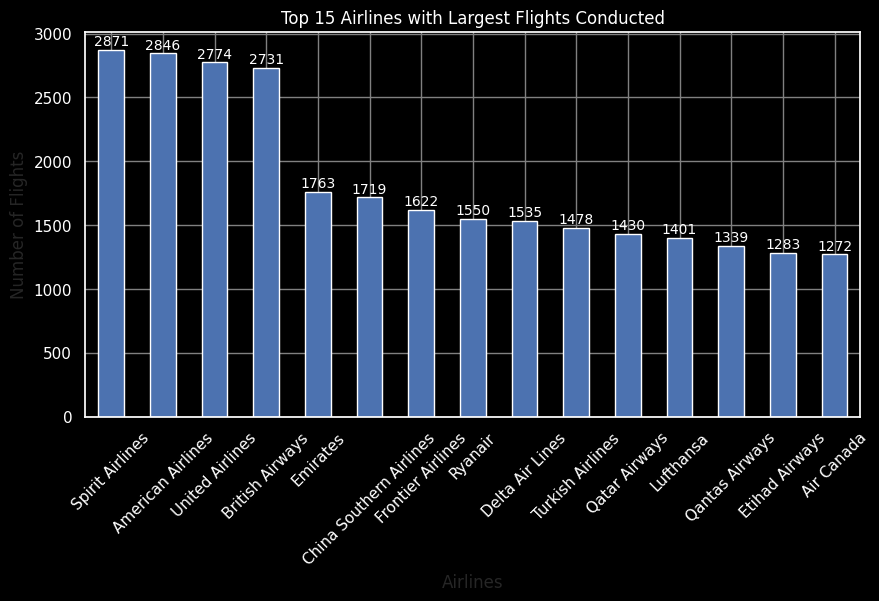

In [ ]:
# Chart - 2 Top airlines with largest flight conducted

# Count the number of occurrences (flights) for each airline
top_airlines = df['airline'].value_counts().nlargest(15)  # 15 is the num of airlines.

# Plotting
plt.figure(figsize=(10, 5))
ax = top_airlines.plot(kind='bar')

# Add value labels on top of bars
for i, v in enumerate(top_airlines):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.title('Top 15 Airlines with Largest Flights Conducted')
plt.xlabel('Airlines')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()




##### 1. Why did you pick the specific chart?

I chose a bar chart because it is easy to understand. It helps me see the number of flights by each airline clearly.
I used it to show the top 10 airlines with the most flights. Also, I added labels to show the exact number of flights on the bars.

##### 2. What is/are the insight(s) found from the chart?

This chart shows which airlines have the most flights — so we can understand who are the top players in the market.

- We can see that 'Spirit Airlines' has the highest number of flights, with a total of 2871.
- This means Spirit Airlines is one of the biggest in terms of how many trips it handles.

#### Chart - 3: Cabin Class VS value for money

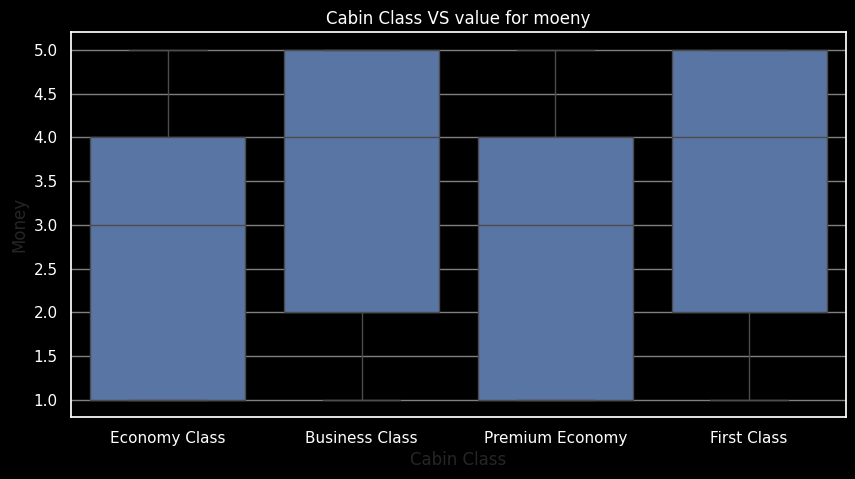

In [ ]:
# Chart - 3 Cabin Class VS value for money

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cabin', y='value_for_money')
plt.title("Cabin Class VS value for moeny")
plt.xlabel("Cabin Class")
plt.ylabel("Money")
plt.show()

##### 1. Why did you pick the specific chart?

I picked this box plot to see how people from different cabin classes feel about the value for money.
It helps us compare which classes are happy with what they paid for — and which are not so happy.

##### 2. What is/are the insight(s) found from the chart?

- Business Class and First Class people mostly give high ratings (4 or 5). They think it's worth the money.
- Economy and Premium Economy ratings are mixed — some people are happy, some are not.
- The "Unknown" class mostly stays around 3, so it's hard to know how they feel exactly.

This means people who pay more usually feel they get good service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- For Business and First Class: Keep giving top service to keep them happy — these customers pay more and expect quality.
- For Economy and Premium Economy: Try to improve experience with small things (like better food, comfy seats).

 This can help ratings go up and attract more flyers.
- If airlines ignore Economy class, those passengers may feel unhappy and stop choosing this airline. That can hurt the business in future.

#### Chart - 4: Top 10 Most Frequently Used Aircrafts

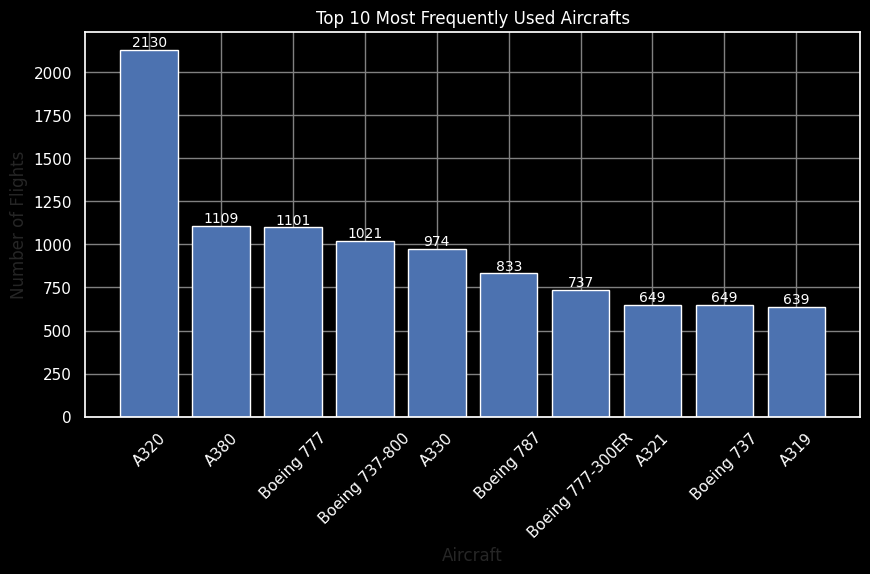

In [ ]:
# Chart - 4  Most Frequently Used Aircrafts
# Top 10 aircrafts
aircraft_counts = df['aircraft'].value_counts().head(10)  # 10 is the number of aircarfts.

# Plot
plt.figure(figsize=(10, 5))
ax = plt.bar(aircraft_counts.index, aircraft_counts.values)

# Title and labels
plt.title('Top 10 Most Frequently Used Aircrafts')
plt.xlabel('Aircraft')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)

# Add values on top of bars
for i, val in enumerate(aircraft_counts.values):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10)

plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart to see how many customers recommend the airline and how many do not.
It’s a simple chart, but it gives a clear idea about customer satisfaction and loyalty.

##### 2. What is/are the insight(s) found from the chart?

The number of people who said “Yes” (they recommend the airline) is a little more than those who said “No”.
The chart feels balanced — but not very positive.
That means many people are not happy enough to recommend the airline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Side
- Some airlines already have happy customers.
- If airlines make small improvements (like better food, service, or comfort), - more people may start saying “Yes”.
- This can bring more loyal and repeat customers.

Negative Side
- A big number of “No” answers is a warning sign.
- If airlines don’t fix problems, it can cause:
  - Bad reviews
  - Fewer repeat customers
  - Damage to the airline’s image

#### Chart - 5: Relationship Between Cabin and Recommended

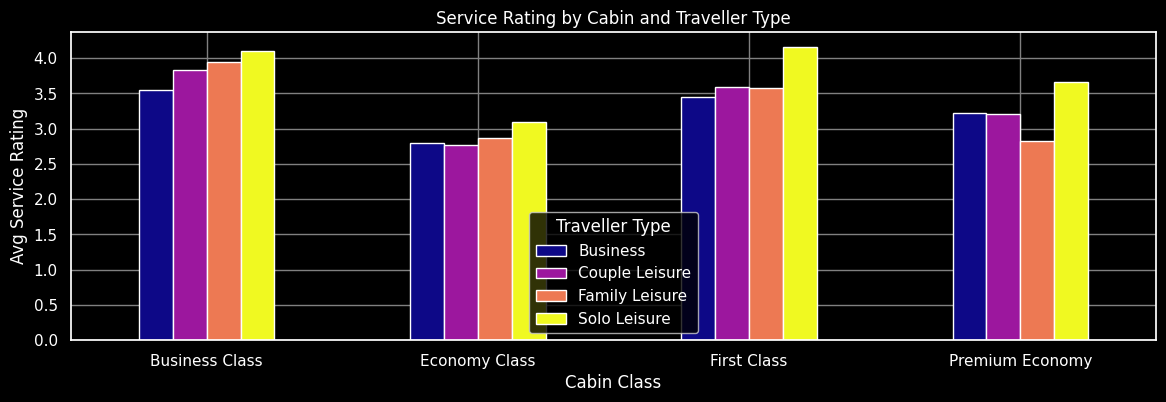

In [ ]:
# Chart - Relationship Between Cabin and Recommended

# Avg service rating by cabin and traveller type
grouped_ratings = df.groupby(['cabin', 'traveller_type'])['cabin_service'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 4))  # Chart size
ax = grouped_ratings.plot(kind='bar', colormap='plasma', ax=plt.gca())

# Labels and title
plt.title('Service Rating by Cabin and Traveller Type')
plt.xlabel('Cabin Class')
plt.ylabel('Avg Service Rating')
plt.xticks(rotation=0)
plt.legend(title='Traveller Type')
plt.show()


##### 1. Why did you pick the specific chart?

I picked grouped bar chart because it shows service ratings clearly for each cabin and traveller type. Easy to compare.

##### 2. What is/are the insight(s) found from the chart?

Economy class service rating is very low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Business and First Class have good service. Airlines can give offers to these passengers to keep them coming back.<br>
Negative: Economy class has poor service. airlines should fix this to keep customers happy.

#### Chart - 6: Relationship Between Cabin and Recommended

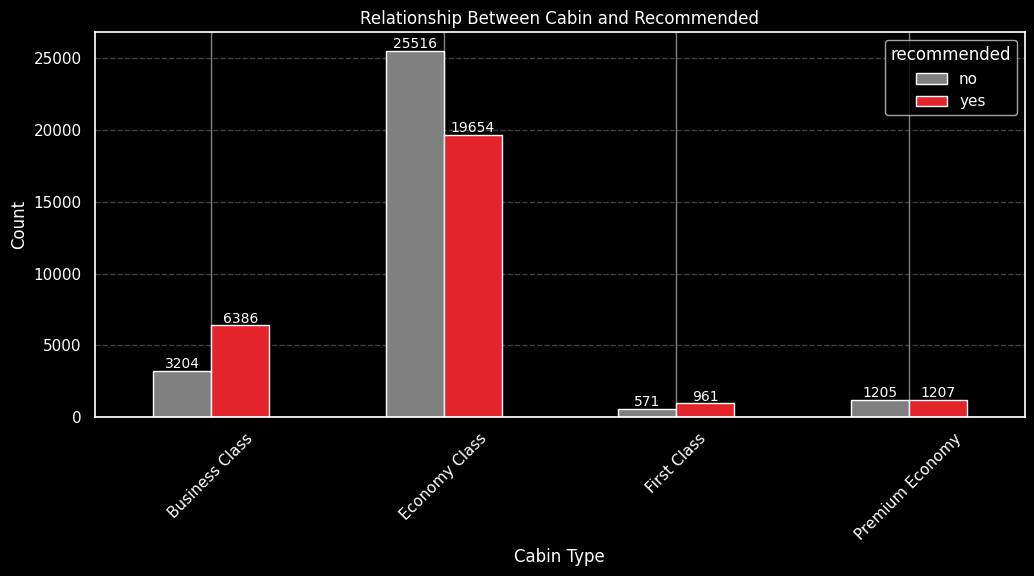

In [ ]:
# Chart - 7 Relationship Between Cabin and Recommended

# Count the occurrences of each combination of 'cabin' and 'recommended'
cabin_recommend_counts = df.groupby(['cabin', 'recommended']).size().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 5))
cabin_recommend_counts.plot(kind='bar', stacked=False, color=custom_palette, ax=plt.gca())

# Add value labels on the bars
for bars in plt.gca().containers:
    plt.gca().bar_label(bars, fmt='%d', label_type='edge', fontsize=10)

plt.title('Relationship Between Cabin and Recommended')
plt.xlabel('Cabin Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart because it helps to compare cabin classes with recommendation answers (Yes or No).
It shows clearly how people from different cabins feel — if they are happy and want to recommend or not.

##### 2. What is/are the insight(s) found from the chart?

Business and Premium Economy passengers say "Yes" more — they are happy and want to recommend.
Economy class passengers say "No" more than others — maybe they are not satisfied.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

People who fly in better cabins are more satisfied.
So airline can offer loyalty programs and maybe add extra services to keep them happy.
This is a good chance to attract high-paying customers.

#### Chart - 7: Ground Service Rating by Airline

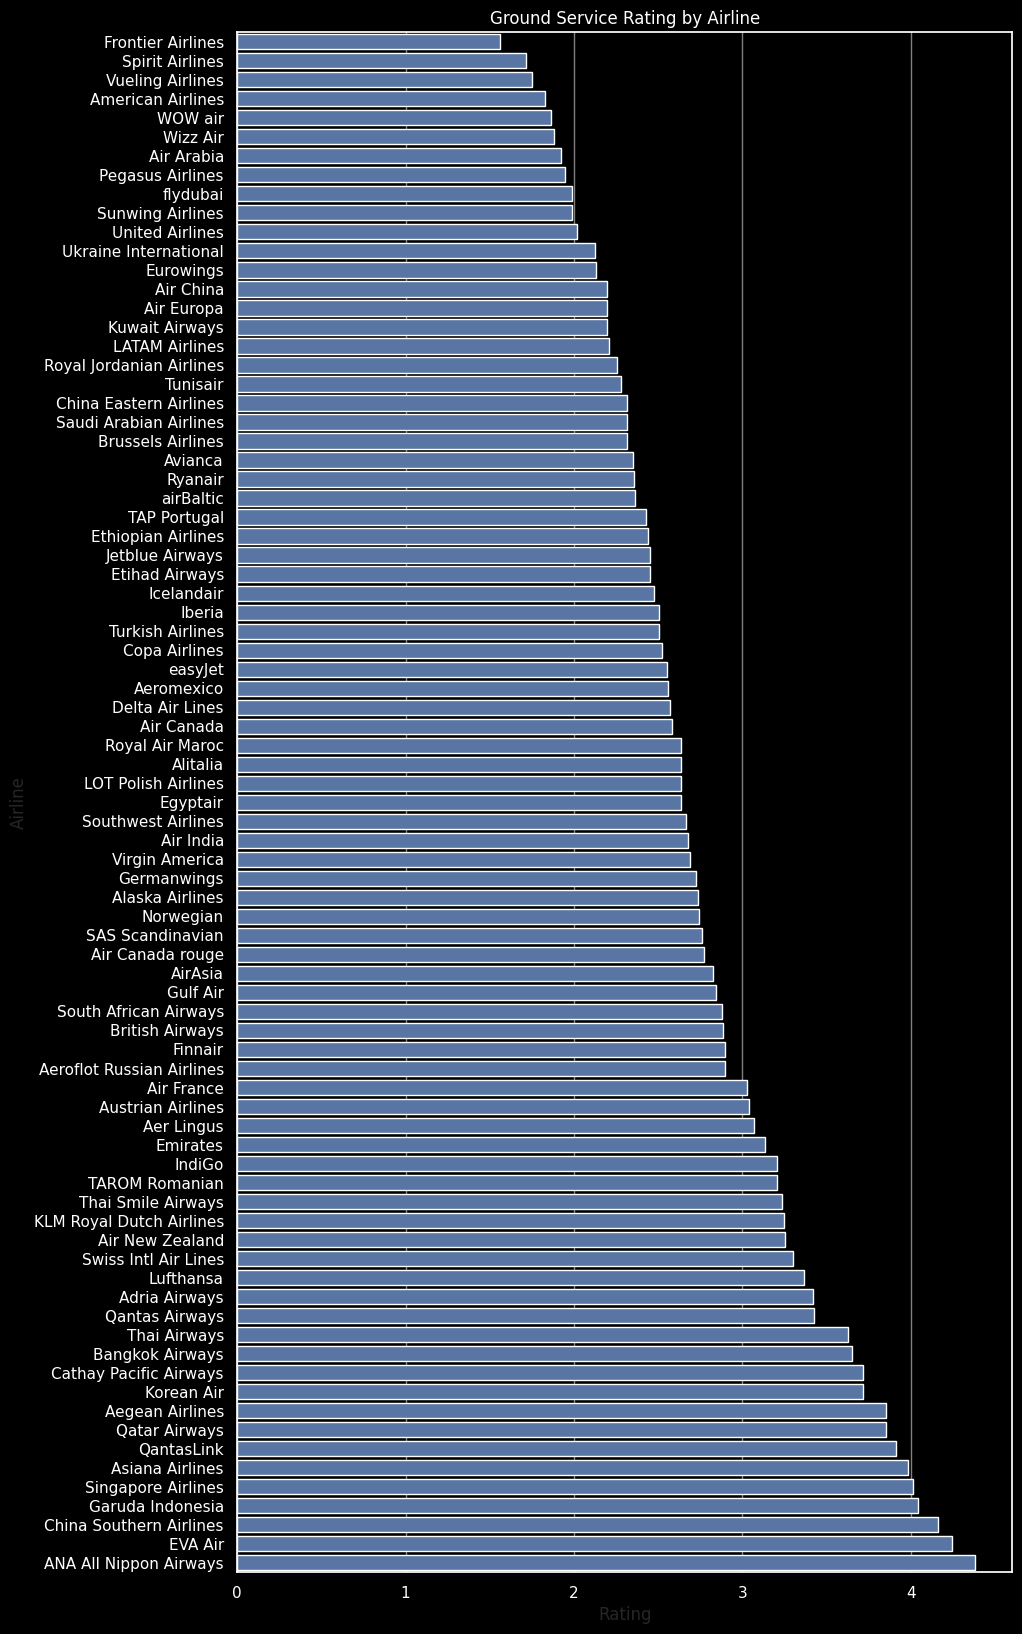

In [ ]:
# Chart - 8 Ground Service Rating by Airline

linewise = df.groupby('airline')['ground_service'].mean().sort_values().index

plt.figure(figsize=(10, 20))
sns.barplot(data=df, y='airline', x='ground_service', errorbar=None, order=linewise)
plt.title("Ground Service Rating by Airline")
plt.xlabel("Rating")
plt.ylabel("Airline")
# plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a horizontal bar chart because it is easy to read and shows the ranking of airlines by their ground service rating.
It helps to quickly see which airline is doing good and which is not.

##### 2. What is/are the insight(s) found from the chart?

- Top airlines like China Southern Airlines, ANA, Singapore Airlines, and Qatar Airways have high ratings — people are happy with their ground service (like check-in, boarding, baggage, etc).
- Airlines like American Airlines, LATAM, and Eurowings have low ratings, which means many people are not satisfied.
- Most airlines are in the middle — not very bad, but can do better.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Airlines with average or low scores can learn from the top airlines.
They can improve by changing the way they handle passengers on ground.
Airlines with high scores can use this in advertisements or marketing to show they are the best — this helps them get more customers and keep their good image.

#### Chart - 8: Overall Rating vs Recommended

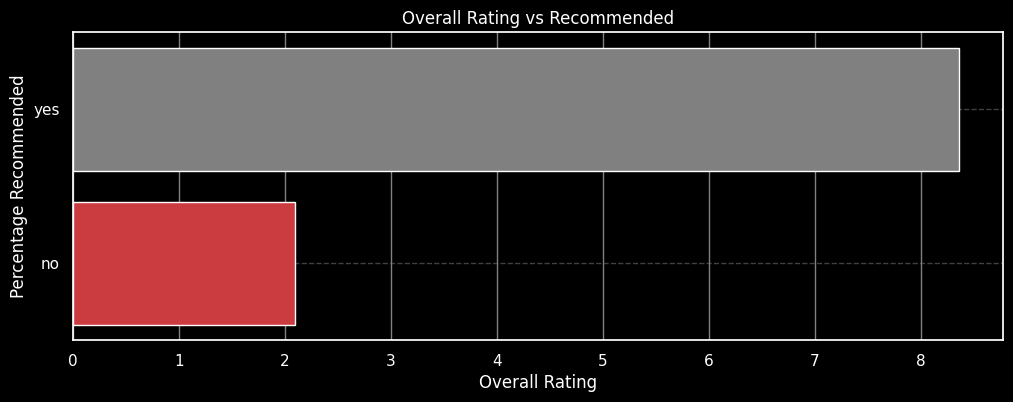

In [ ]:
# Chart - 9 Overall Rating vs Recommended

plt.figure(figsize=(12, 4))
sns.barplot(x='overall', y='recommended', data=df, ci=None, estimator=lambda x: sum(x)/len(x), palette=custom_palette)
# estimator=lambda x: sum(x)/len(x), i am basically tring to get mean.
# Add labels and title
plt.title('Overall Rating vs Recommended')
plt.xlabel('Overall Rating')
plt.ylabel('Percentage Recommended')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The grouped bar chart is good because it shows how overall rating and recommendation are connected. We can easily see how happy people are with their flight, and if they said “yes” to recommend the airline.

##### 2. What is/are the insight(s) found from the chart?

- People who gave high ratings (like 8, 9, 10) mostly said “Yes”, they will recommend the airline.
- People who gave low ratings (like 1, 2, 3) mostly said “No”, they will not recommend.

This means: if people are happy, they tell others to fly with that airline. If they are not happy, they say no.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- If the airline wants more happy and returning customers, they should try to make the flight experience better.
- Better service = higher rating = more people recommend = more business and happy customers.

#### Chart - 9 - Correlation Heatmap

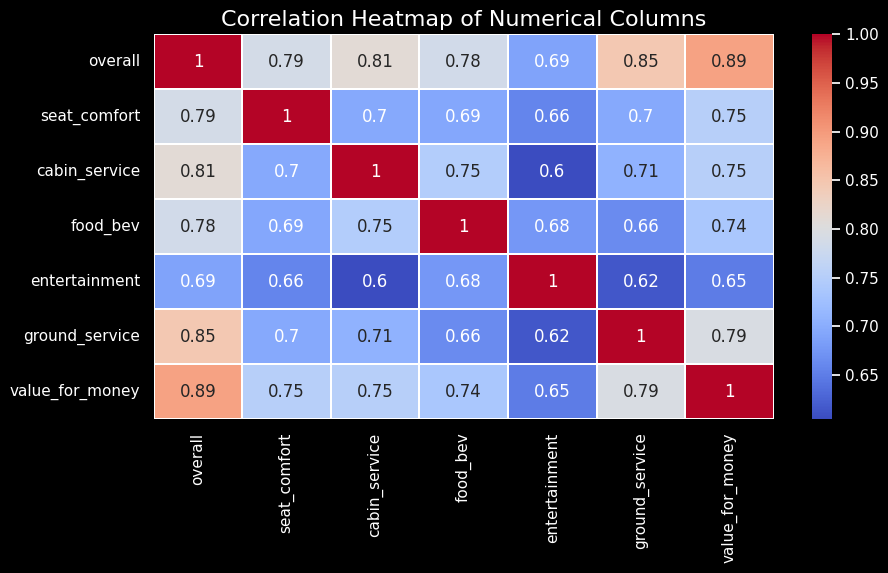

In [ ]:
# Correlation Heatmap visualization code

numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.01)

# Add title
plt.title('Correlation Heatmap of Numerical Columns', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I used a heatmap because it’s a great way to see how different numbers are connected to each other. It helps me understand which things go up or down together. It also shows if any columns are too similar, which can be a problem when training a model.

##### 2. What is/are the insight(s) found from the chart?

There's a strong positive connection between overall rating and value for money — the number is 0.89, which is very high.
→ This means when people feel they’re getting good value, they also give a high overall rating. So, if the airline focuses on value, it can make more people happy.
There’s also a negative connection between entertainment and cabin service — the number is -0.60.
→ This might mean when people don’t like the entertainment, they also feel less happy with the service. That can be a problem.

#### Chart - 10 - Pair Plot

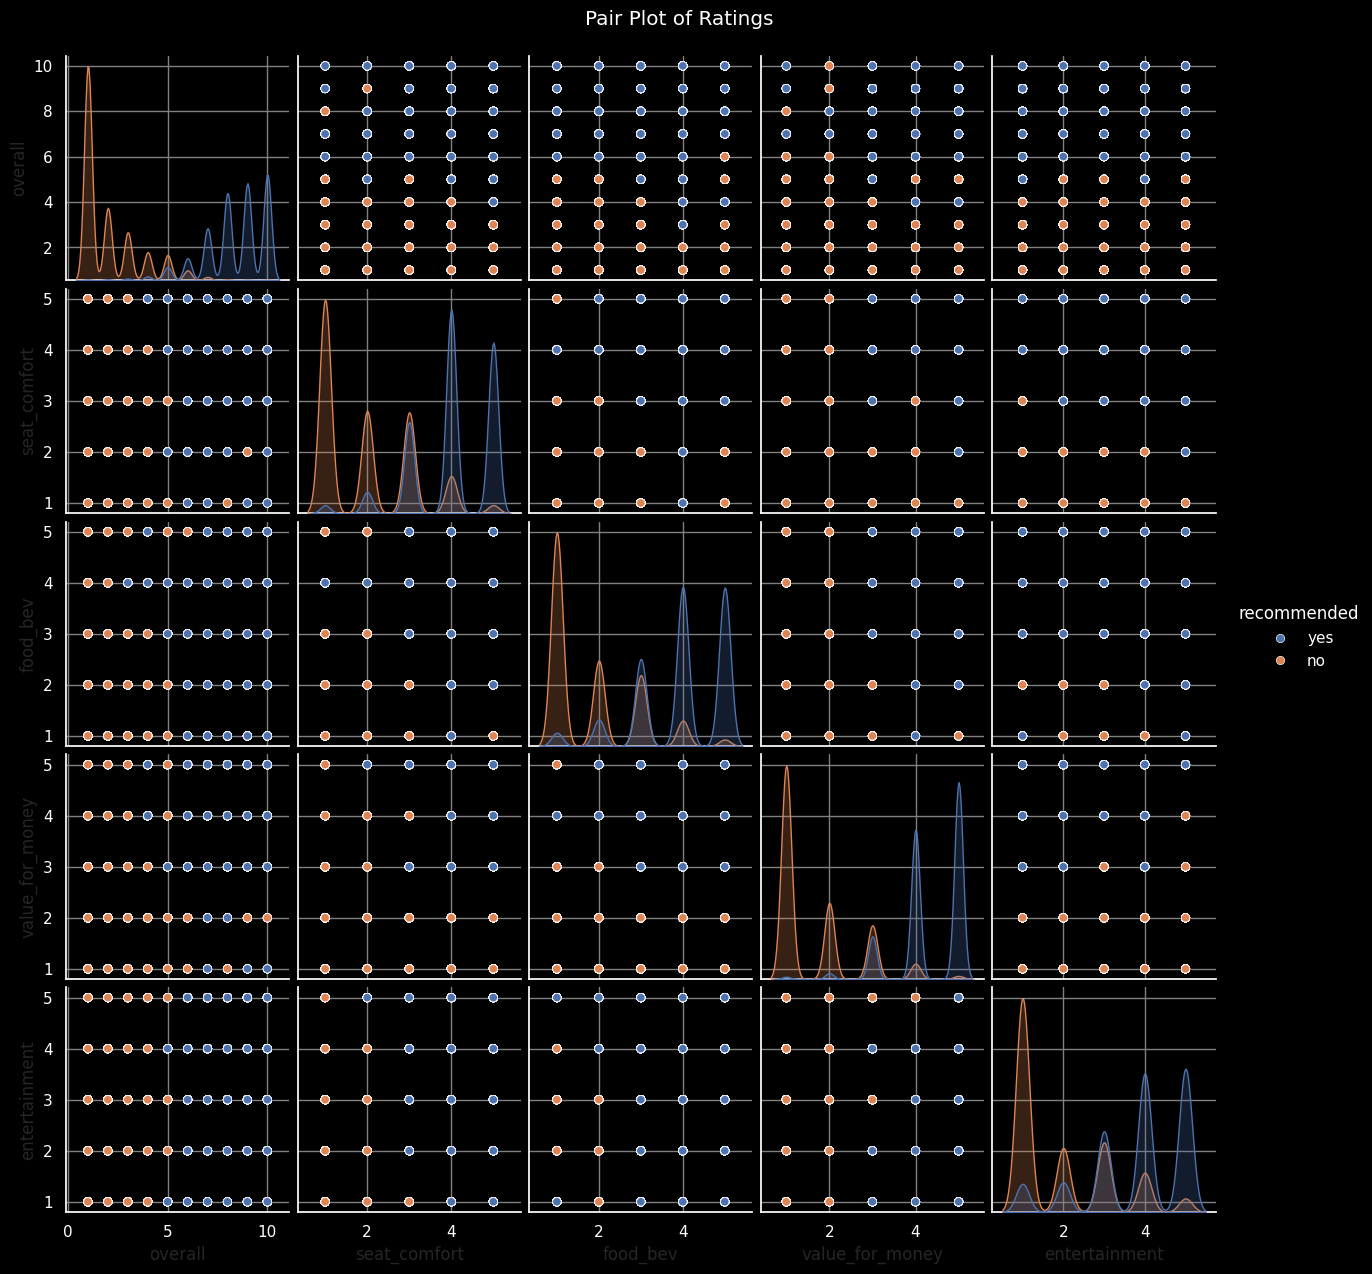

In [ ]:
# # Pair Plot visualization code

sns.pairplot(df[['overall', 'seat_comfort', 'food_bev', 'value_for_money', 'entertainment', 'recommended']], hue='recommended')
plt.suptitle('Pair Plot of Ratings', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it shows how different rating things like seat comfort, food, and value for money are connected with each other. It also shows if customer recommended the airline or not. It is easy to see how ratings change between people who said yes or no.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that people who recommended the airline (blue dots) mostly gave higher ratings for seat comfort, food, value for money, and entertainment. People who did not recommend (orange dots) gave mostly low ratings.

Also, when value for money is high, most people recommend the airline. Same thing with seat comfort and food.

## ***4. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1: Service Quality and Recommendations

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 1: Service Quality and Recommendations**

**Null Hypothesis (H₀):** There is no significant relationship between the airline's cabin service rating and whether a customer recommends the airline.

 **Alternative Hypothesis (H₁):** There is a significant relationship between the cabin service rating and customer recommendations.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create frequency table
table = pd.crosstab(df['cabin_service'], df['recommended'])

# Run chi-square test
result = stats.chi2_contingency(table)

# Get test results
chi_val = result[0]
p_val = result[1]
dof = result[2]
expected = result[3]

# outputs
print("Chi-Square:", chi_val)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)

# Set threshold
alpha = 0.05

# Check significance
if p_val < alpha:
    print("\nReject null hypothesis")
    print("Significant relationship found")
else:
    print("\nDo not reject null hypothesis")
    print("No significant relationship")


Chi-Square: 32993.17633549465
P-Value: 0.0
Degrees of Freedom: 4

Reject null hypothesis
Significant relationship found


##### Which statistical test have you done to obtain P-Value?

The P-Value is 0.0, which is very close to zero.

##### Why did you choose the specific statistical test?

Both cabin_service and recommended are category-type data.
This test checks if the two are connected.
It compares real values with expected values.
It works well for non-number data.
It tells if recommendation depends on cabin service.

### Hypothetical Statement - 2: Food and Beverages VS. Recommendation

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2: Traveller Type and Value for Money

**Null Hypothesis (H₀):** Traveller type (Business, Leisure, etc.) does not significantly affect the perceived value for money rating.

**Alternative Hypothesis (H₁):** Traveller type has a significant impact on the value for money rating.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Make table
table = pd.crosstab(df['traveller_type'], df['value_for_money'])

# Run test
chi, p, dof, expected = chi2_contingency(table)

# output
print("Chi-Square:", chi)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

print("")

# Check result
if p < 0.05:
    print("Reject null: Significant link")
else:
    print("Don't reject null: No strong link")

Chi-Square: 474.4462563096612
Degrees of Freedom: 12
P-Value: 6.041155313801727e-94

Reject null: Significant link


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

Chi-Square Test is used here.

traveller_type and value_for_money are both category-type.
This test checks if they are connected.
It is good for checking value counts in each group.

### Hypothetical Statement - 3: Overall Rating vs Recommendation

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3: Overall Rating vs Recommendation

H₀ (Null): People who recommend and don’t recommend give similar overall ratings.
H₁ (Alternative): People who recommend the airline give higher overall ratings than those who don’t.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value : Independent Samples T-Test

# Get recommended group
yes_group = df[df['recommended'] == 'yes']['overall'].dropna()

# Get not recommended group
no_group = df[df['recommended'] == 'no']['overall'].dropna()

# Run t-test
t, p = stats.ttest_ind(yes_group, no_group, equal_var=False)

# output
print("T-Statistic:", t)
print("P-Value:", p)
print("")

# Check result
if p < 0.05:
    print("Reject null: Groups are different")
else:
    print("Don't reject null: No strong difference")

T-Statistic: 493.7404715695987
P-Value: 0.0

Reject null: Groups are different


##### Which statistical test have you done to obtain P-Value?

Independent Samples T-Test

##### Why did you choose the specific statistical test?

Independent Samples T-Test is used because:

overall is a number (rating from 1 to 10).
recommended is Yes or No (2 groups).
The test checks if the average rating is different between those who recommend and those who don’t.
It tells if this difference is real or just by chance.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print(missing_values)

airline                1
overall             1783
author                 1
review_date        13221
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
year_month         13221
dtype: int64


In [ ]:
# Percentage of missing values

missing_percentage = (missing_values / len(df)) * 100
print("Percentage of Missing Values:\n", round(missing_percentage,2))

Percentage of Missing Values:
 airline             0.00
overall             2.91
author              0.00
review_date        21.61
customer_review     0.00
aircraft           69.78
traveller_type     38.64
cabin               4.05
route              38.69
date_flown         38.82
seat_comfort        8.13
cabin_service       8.08
food_bev           20.99
entertainment      34.25
ground_service     39.25
value_for_money     3.04
recommended         2.33
year_month         21.61
dtype: float64


Clearly 69 % values of column 'aircraft' is missing. so we can drop that column.

In [ ]:
# Copy of dataframe is created for preprocessing.

reviews_df = df.copy()


In [ ]:
reviews_df.drop('aircraft', axis=1, inplace=True) # Droping aircarft column

1. The 'author' column doesn’t help much, so we can remove it.
2. 'review_date' is almost same as 'date_flown', so it's not useful.

In [ ]:
# drop the columns 'author' and 'review_date'
reviews_df.drop(['author', 'review_date'], axis=1, inplace=True)

In [ ]:
missing_values = reviews_df.isnull().sum()
print(missing_values)

airline                1
overall             1783
customer_review        1
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
year_month         13221
dtype: int64


In [ ]:
#  Drop rows with minor missing values
reviews_df.dropna(subset=['airline', 'customer_review'], inplace=True)

In [ ]:
# Select numerical columns
num_cols = reviews_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display numerical columns
print("Numerical Columns:", num_cols)


Numerical Columns: ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


In [ ]:
# Median Imputation for Numerical Columns
for col in num_cols:
    reviews_df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Mode Imputation for Categorical Columns
cat_cols = ['traveller_type', 'cabin', 'route', 'recommended', 'date_flown', 'year_month']
for col in cat_cols:
    reviews_df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Verify if missing values are handled
print("Missing values after imputation:")
print(reviews_df.isnull().sum())

Missing values after imputation:
airline            0
overall            0
customer_review    0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
year_month         0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

- **Dropped Useless Columns**: Removed 'author', 'aircraft', and 'review_date' because they had too many missing values.
- **Dropped Rows with Few Missing**: Removed rows where 'airline' or 'customer_review' was missing.
- **Filled Numbers with Median**: Used median to fill missing values in number columns.
- **Filled Categories with Mode**: Used most common value (mode) to fill missing in category columns.

### 2. Handling Outliers

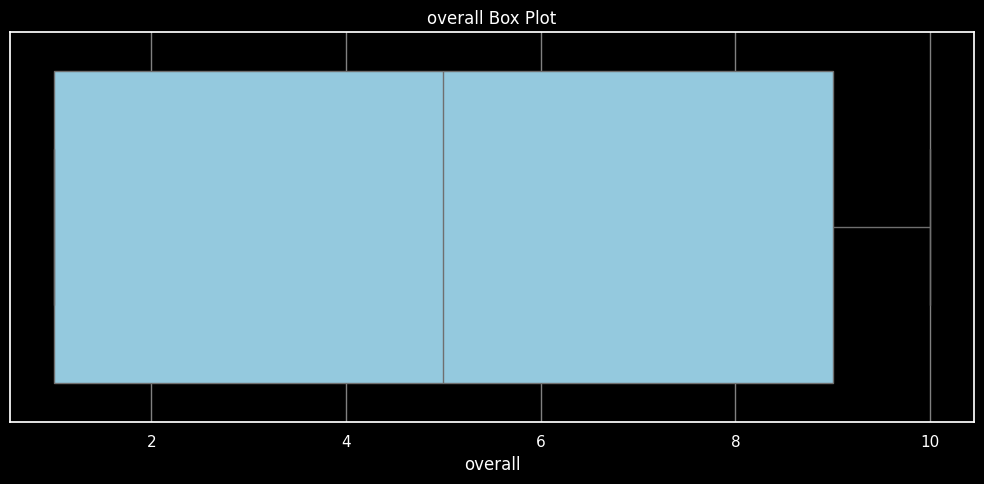

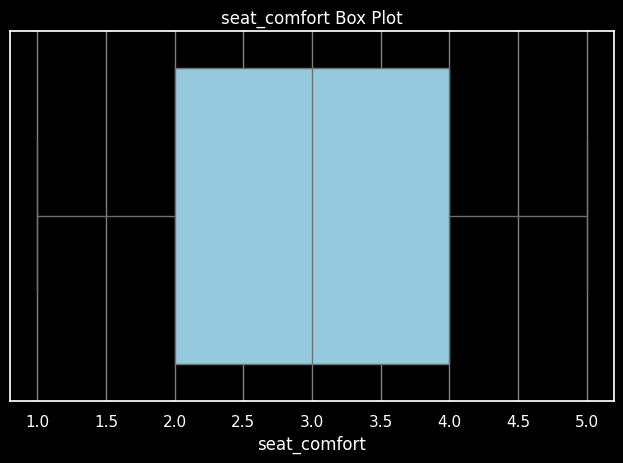

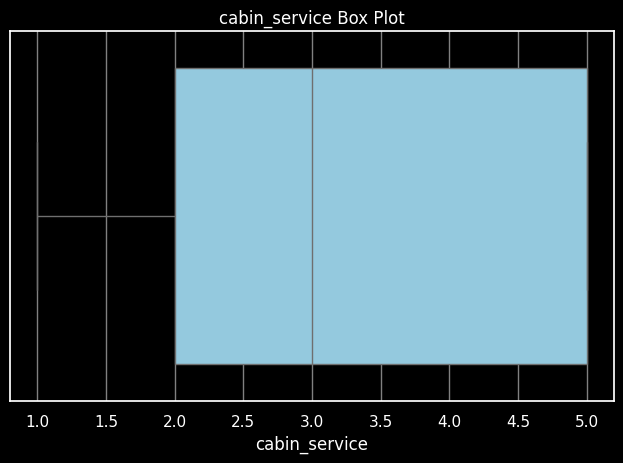

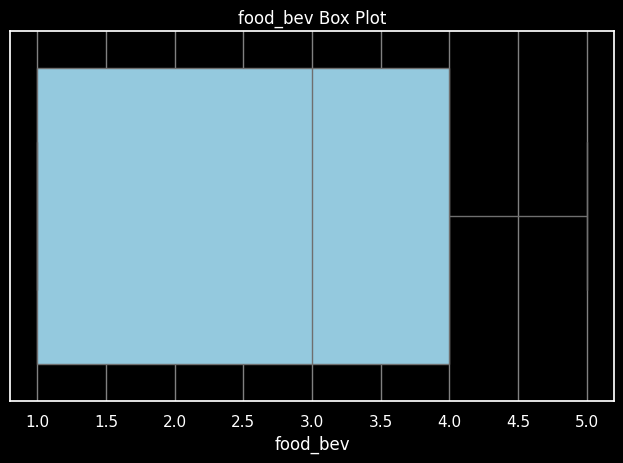

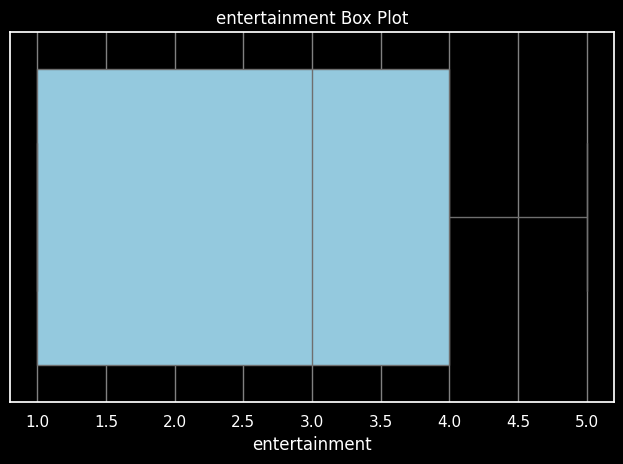

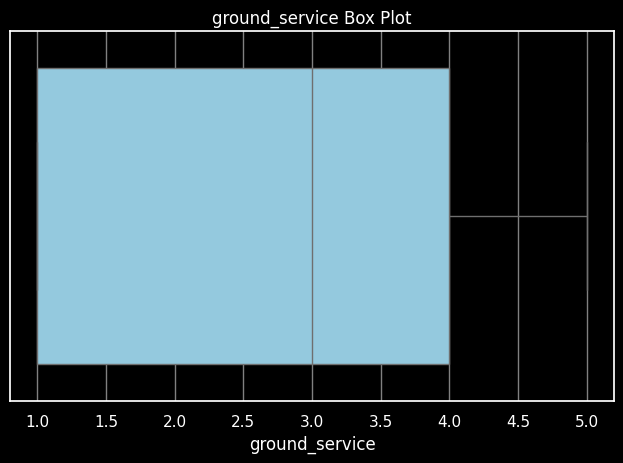

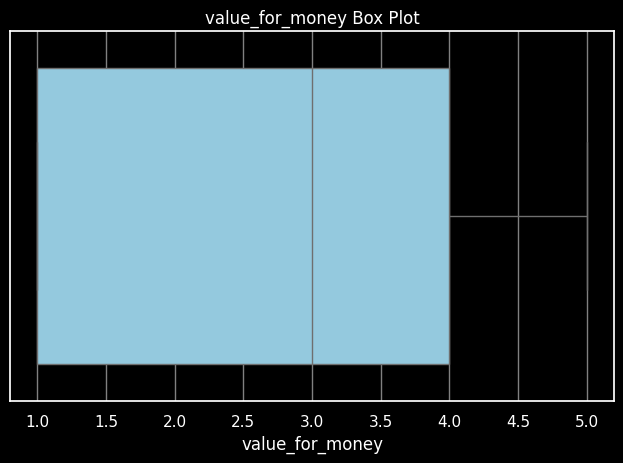

In [ ]:
# Handling Outliers & Outlier treatments

# Box plots
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_cols, 1):
  sns.boxplot(x=df[col], color='skyblue')
  plt.title(f'{col} Box Plot')
  plt.tight_layout()
  plt.show()
  print("")

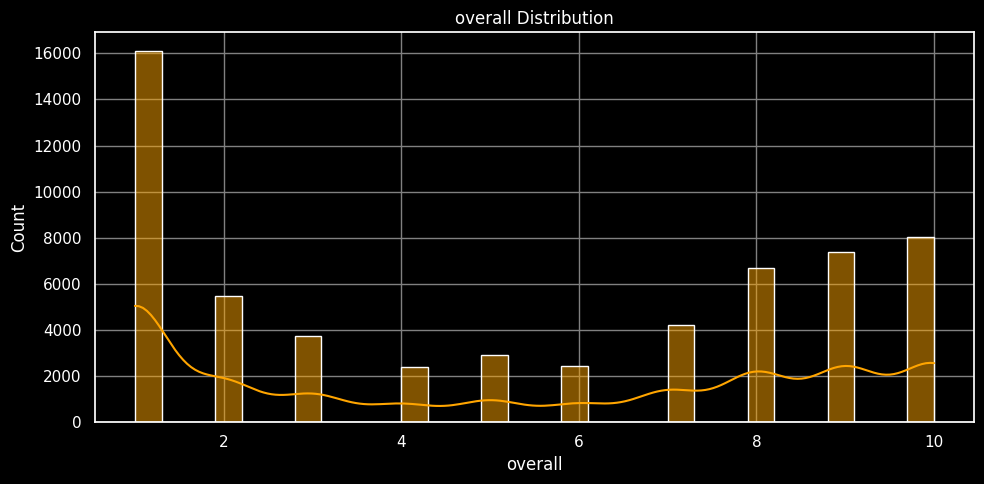

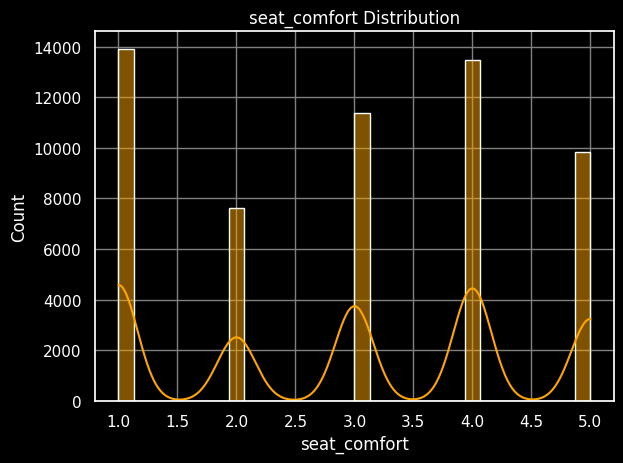

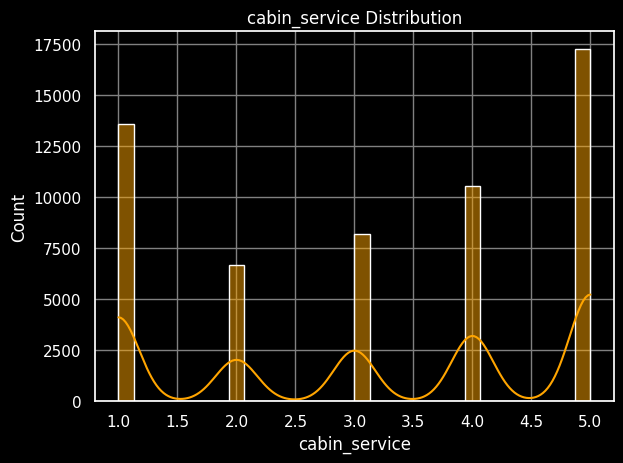

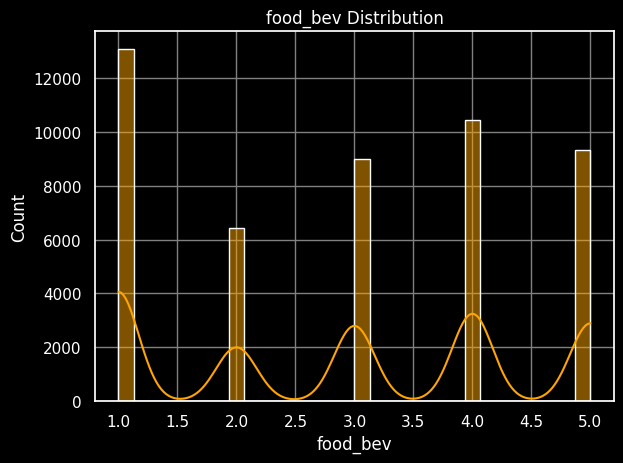

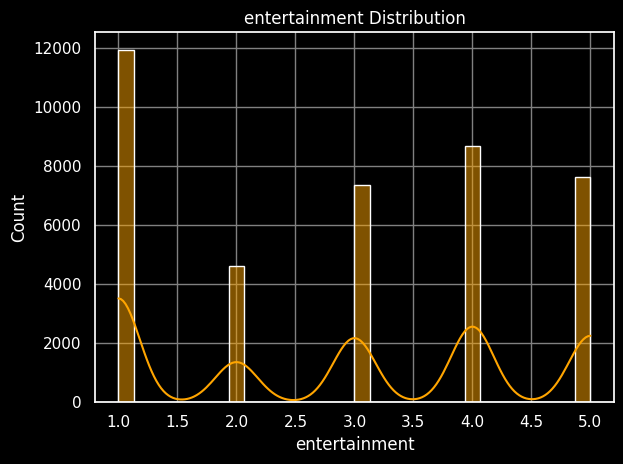

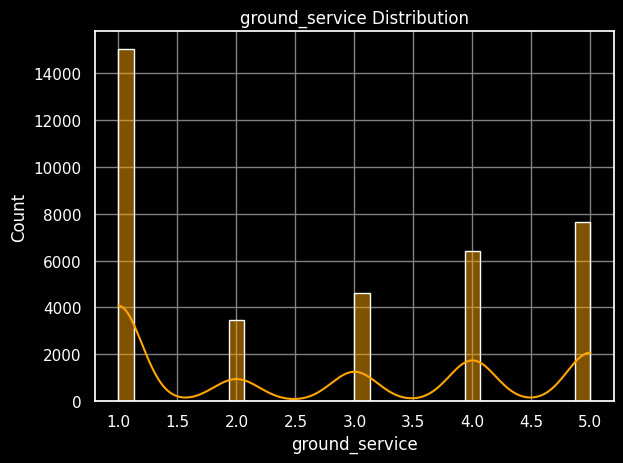

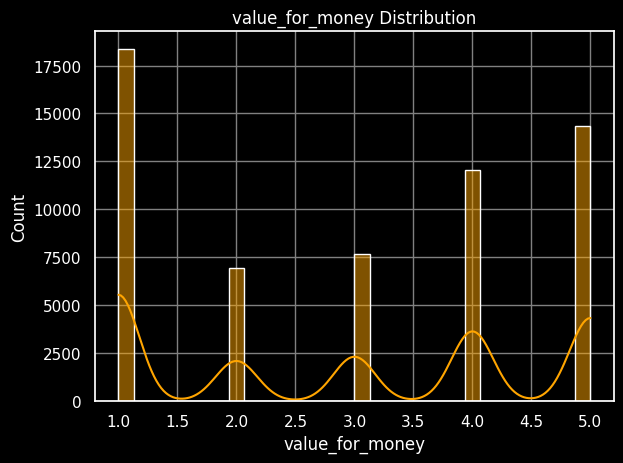

In [ ]:
# Histograms
plt.figure(figsize=(10, 5))

for i, col in enumerate(num_cols, 1):
  sns.histplot(df[col], kde=True, color='orange', bins=30)
  plt.title(f'{col} Distribution')
  plt.tight_layout()
  plt.show()
  print("")

##### What all outlier treatment techniques have you used and why did you use those techniques?

Boxplot and histogram were used to check outliers. No clear outliers were found.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
# Get categorical columns
cat_cols = reviews_df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", cat_cols)

Categorical Columns: Index(['airline', 'customer_review', 'traveller_type', 'cabin', 'route',
       'date_flown', 'recommended'],
      dtype='object')


In [ ]:
# Label encode binary column
le = LabelEncoder()
reviews_df['recommended_encoded'] = le.fit_transform(reviews_df['recommended'])

In [ ]:
# If more binary cols, add them here
binary_cols = ['recommended']
for col in binary_cols:
    reviews_df[col + '_encoded'] = le.fit_transform(reviews_df[col])


In [ ]:
# Check result
print(reviews_df[['recommended', 'recommended_encoded']].head())

  recommended  recommended_encoded
1         yes                    1
3          no                    0
5          no                    0
7         yes                    1
9          no                    0


In [ ]:
# One-Hot encode multi-class columns
multi_class_cols = ['traveller_type', 'cabin']
reviews_df = pd.get_dummies(reviews_df, columns=multi_class_cols, drop_first=True)

In [ ]:
# Check new columns
reviews_df.columns


Index(['airline', 'overall', 'customer_review', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'year_month',
       'recommended_encoded', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure',
       'cabin_Economy Class', 'cabin_First Class', 'cabin_Premium Economy'],
      dtype='object')

In [ ]:
# Frequency encode 'route'
route_freq = reviews_df['route'].value_counts(normalize=True)
reviews_df['route_encoded'] = reviews_df['route'].map(route_freq)

In [ ]:
# Check route encoding
reviews_df[['route', 'route_encoded']].head()

,route,route_encoded
1,London to Izmir via Istanbul,0.000033
3,Istanbul to Bucharest,0.000065
5,Rome to Prishtina via Istanbul,0.000016
7,Washington Dulles to Karachi,0.000016
9,Mumbai to Dublin via Istanbul,0.000016


In [ ]:
# Frequency encode 'airline'
airline_freq = reviews_df['airline'].value_counts(normalize=True)
reviews_df['airline_freq_encoded'] = reviews_df['airline'].map(airline_freq)

In [ ]:
# Drop unused columns
reviews_df.drop(['airline', 'customer_review', 'route', 'recommended'], axis=1, inplace=True)

print("Dropped airline, customer_review, route, and recommended columns.")

Dropped airline, customer_review, route, and recommended columns.


In [ ]:
# Convert date_flown to ordinal
reviews_df['date_flown'] = pd.to_datetime(reviews_df['date_flown'], errors='coerce')
reviews_df['date_flown_ordinal'] = reviews_df['date_flown'].map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)
reviews_df.drop('date_flown', axis=1, inplace=True)


In [ ]:
reviews_df.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'year_month',
       'recommended_encoded', 'traveller_type_Couple Leisure',
       'traveller_type_Family Leisure', 'traveller_type_Solo Leisure',
       'cabin_Economy Class', 'cabin_First Class', 'cabin_Premium Economy',
       'route_encoded', 'airline_freq_encoded', 'date_flown_ordinal'],
      dtype='object')

In [ ]:
# Convert year_month to float like 2022.08
reviews_df['year_month_float'] = reviews_df['year_month'].dt.year + (reviews_df['year_month'].dt.month / 12)
reviews_df.drop('year_month', axis=1, inplace=True)


In [ ]:
# Drop the ordinal date if not needed
reviews_df.drop('date_flown_ordinal', axis=1, inplace=True)

In [ ]:
reviews_df.head()


,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended_encoded,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,route_encoded,airline_freq_encoded,year_month_float
1,7.0,4.0,5.0,4.0,4.0,2.0,4.0,1,False,False,False,True,False,False,0.000033,0.024157,2019.416667
3,2.0,4.0,1.0,1.0,1.0,1.0,1.0,0,False,True,False,True,False,False,0.000065,0.024157,2019.416667
5,3.0,1.0,4.0,1.0,3.0,1.0,2.0,0,False,False,False,True,False,False,0.000016,0.024157,2019.416667
7,10.0,4.0,5.0,5.0,5.0,5.0,5.0,1,False,False,True,True,False,False,0.000016,0.024157,2019.416667
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,False,False,True,True,False,False,0.000016,0.024157,2019.416667


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   overall                        61183 non-null  float64
 1   seat_comfort                   61183 non-null  float64
 2   cabin_service                  61183 non-null  float64
 3   food_bev                       61183 non-null  float64
 4   entertainment                  61183 non-null  float64
 5   ground_service                 61183 non-null  float64
 6   value_for_money                61183 non-null  float64
 7   recommended_encoded            61183 non-null  int64  
 8   traveller_type_Couple Leisure  61183 non-null  bool   
 9   traveller_type_Family Leisure  61183 non-null  bool   
 10  traveller_type_Solo Leisure    61183 non-null  bool   
 11  cabin_Economy Class            61183 non-null  bool   
 12  cabin_First Class              61183 non-null  boo

#### What all categorical encoding techniques have you used & why did you use those techniques?

- Changed 'recommended' (Yes/No) into numbers using Label Encoding.
- Used One-Hot Encoding for 'cabin' and 'traveller_type' (many category types).
- Used Frequency Encoding for 'route' and 'airline' (many unique names).
- Dropped 'customer_review' as it's not needed for analysis.
- Changed 'date_flown' into datetime format.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Get correlation matrix
corr = reviews_df.corr(numeric_only=True)

# Set threshold
cutoff = 0.85

# Store pairs
high_corr = set()

# Find high correlation pairs
for i in range(len(corr.columns)):

    for j in range(i):

        if abs(corr.iloc[i, j]) > cutoff:
            col_a = corr.columns[i]
            col_b = corr.columns[j]
            high_corr.add((col_a, col_b))

# Show high correlation pairs
print("High Correlation Pairs:")
for a, b in high_corr:
    print(a, "<-->", b)

# Drop second feature in each pair
drop_cols = [b for (a, b) in high_corr]
reviews_df.drop(drop_cols, axis=1, inplace=True)

print("Dropped columns:", drop_cols)


High Correlation Pairs:
recommended_encoded <--> overall
value_for_money <--> overall
Dropped columns: ['overall', 'overall']


##### What all feature selection methods have you used  and why?

Manually removed many columns that were not useful from the dataset.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data is changed to improve machine learning results.

- Categorical data is encoded.
- Missing values are fixed.
- Outliers checked (none found).
- Dates changed to datetime format.

### 6. Data Scaling

In [ ]:
reviews_df.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended_encoded,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,route_encoded,airline_freq_encoded,year_month_float
1,4.0,5.0,4.0,4.0,2.0,4.0,1,False,False,False,True,False,False,0.000033,0.024157,2019.416667
3,4.0,1.0,1.0,1.0,1.0,1.0,0,False,True,False,True,False,False,0.000065,0.024157,2019.416667
5,1.0,4.0,1.0,3.0,1.0,2.0,0,False,False,False,True,False,False,0.000016,0.024157,2019.416667
7,4.0,5.0,5.0,5.0,5.0,5.0,1,False,False,True,True,False,False,0.000016,0.024157,2019.416667
9,1.0,1.0,1.0,1.0,1.0,1.0,0,False,False,True,True,False,False,0.000016,0.024157,2019.416667


In [ ]:
# Scaling your data
# Pick number columns
num_cols = reviews_df.select_dtypes(include=['float64', 'int64']).columns

# Scale using Z-score
scaler = StandardScaler()
reviews_df[num_cols] = scaler.fit_transform(reviews_df[num_cols])

# Show result
reviews_df.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended_encoded,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,route_encoded,airline_freq_encoded,year_month_float
1,0.753443,1.206838,0.802125,0.879261,-0.636196,0.669789,1.071121,False,False,False,True,False,False,-0.795296,0.231438,1.772888
3,0.753443,-1.451475,-1.472951,-1.577580,-1.425114,-1.248168,-0.933602,False,True,False,True,False,False,-0.795123,0.231438,1.772888
5,-1.425371,0.542260,-1.472951,0.060314,-1.425114,-0.608849,-0.933602,False,False,False,True,False,False,-0.795383,0.231438,1.772888
7,0.753443,1.206838,1.560484,1.698207,1.730556,1.309108,1.071121,False,False,True,True,False,False,-0.795383,0.231438,1.772888
9,-1.425371,-1.451475,-1.472951,-1.577580,-1.425114,-1.248168,-0.933602,False,False,True,True,False,False,-0.795383,0.231438,1.772888


##### Which method have you used to scale you data and why?

I used Z-score scaling because:

- It makes data centered at 0 with standard deviation 1.
- It works better with outliers than Min-Max scaling.
- It helps models perform better by keeping features on a similar scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed for this dataset because:

- It has only 16 features — not too many.
- There are enough rows (61,183), so no risk of overfitting.
- Reducing features may remove useful info and hurt the model.

### 8. Data Splitting

Converting 'year_month' column datatype.

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Set features and target
X = reviews_df.drop('recommended_encoded', axis=1)
y = reviews_df['recommended_encoded']

# Split into train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Show shapes
print("Train X:", X_train.shape)
print("Train y:", y_train.shape)
print("Test X:", X_test.shape)
print("Test y:", y_test.shape)

Train X: (48946, 15)
Train y: (48946,)
Test X: (12237, 15)
Test y: (12237,)


##### What data splitting ratio have you used and why?

Train-Test Split (80%-20%) Reason:

- More training data (80%) helps the model learn better.
- 20% test data gives enough to check accuracy and avoid overfitting.

### 9. Handling Imbalanced Dataset

Train Class %:
recommended_encoded
-0.933602    0.534303
 1.071121    0.465697
Name: proportion, dtype: float64
Test Class %:
recommended_encoded
-0.933602    0.534281
 1.071121    0.465719
Name: proportion, dtype: float64


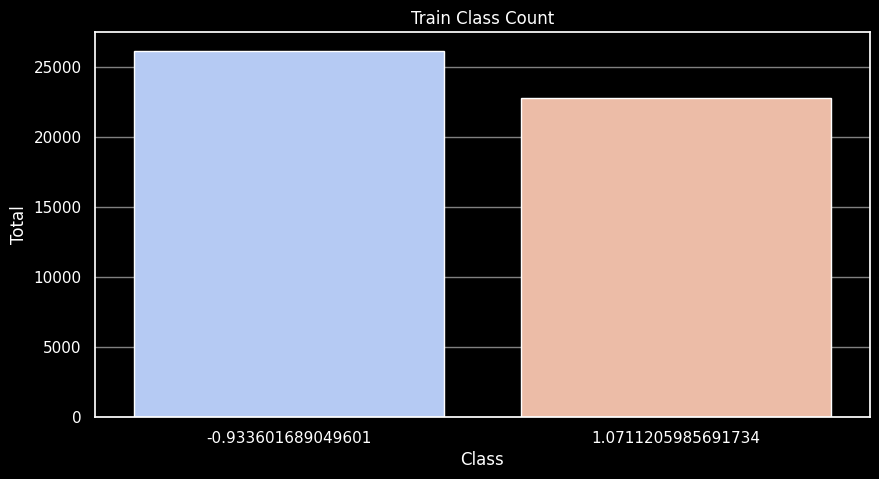

In [ ]:
# Handling Imbalanced Dataset (If needed)

# Check target class balance
print("Train Class %:")
print(y_train.value_counts(normalize=True))

print("Test Class %:")
print(y_test.value_counts(normalize=True))

# Plot class counts in train set
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, palette='coolwarm')
plt.title('Train Class Count')
plt.xlabel('Class')
plt.ylabel('Total')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

No, the dataset is not highly imbalanced.

`"Not Recommended" = 53.43%`<br>
`"Recommended" = 46.57%`<br>
`Difference = Only 7%`<br>
The class distribution is quite close, so no need for class balancing methods.

## ***6. ML Model Implementation***

### ML Model - 1: Logistic Regression

In [ ]:
reviews_df.head()

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended_encoded,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Economy Class,cabin_First Class,cabin_Premium Economy,route_encoded,airline_freq_encoded,year_month_float
1,0.753443,1.206838,0.802125,0.879261,-0.636196,0.669789,1.071121,False,False,False,True,False,False,-0.795296,0.231438,1.772888
3,0.753443,-1.451475,-1.472951,-1.577580,-1.425114,-1.248168,-0.933602,False,True,False,True,False,False,-0.795123,0.231438,1.772888
5,-1.425371,0.542260,-1.472951,0.060314,-1.425114,-0.608849,-0.933602,False,False,False,True,False,False,-0.795383,0.231438,1.772888
7,0.753443,1.206838,1.560484,1.698207,1.730556,1.309108,1.071121,False,False,True,True,False,False,-0.795383,0.231438,1.772888
9,-1.425371,-1.451475,-1.472951,-1.577580,-1.425114,-1.248168,-0.933602,False,False,True,True,False,False,-0.795383,0.231438,1.772888


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61183 entries, 1 to 131894
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seat_comfort                   61183 non-null  float64
 1   cabin_service                  61183 non-null  float64
 2   food_bev                       61183 non-null  float64
 3   entertainment                  61183 non-null  float64
 4   ground_service                 61183 non-null  float64
 5   value_for_money                61183 non-null  float64
 6   recommended_encoded            61183 non-null  float64
 7   traveller_type_Couple Leisure  61183 non-null  bool   
 8   traveller_type_Family Leisure  61183 non-null  bool   
 9   traveller_type_Solo Leisure    61183 non-null  bool   
 10  cabin_Economy Class            61183 non-null  bool   
 11  cabin_First Class              61183 non-null  bool   
 12  cabin_Premium Economy          61183 non-null  boo

In [ ]:
# Check data types
print("y_train:", y_train.dtype)
print("y_test:", y_test.dtype)

# Fix target type if needed
if y_train.dtype != 'int' and y_train.dtype != 'bool':
    y_train = y_train.round().astype(int)
    y_test = y_test.round().astype(int)

# Start timer
start = time.time()

# Train model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Train results
print("\n--- Train Set ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1:", f1_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Test results
print("\n--- Test Set ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# End timer
end = time.time()
print("Time taken:", round(end - start, 2), "seconds")

y_train: float64
y_test: float64

--- Train Set ---
Accuracy: 0.9378907367302742
ROC-AUC: 0.9376589827524876
Precision: 0.9324809527979683
Recall: 0.9342809511274897
F1: 0.9333800841514727
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94     26152
           1       0.93      0.93      0.93     22794

    accuracy                           0.94     48946
   macro avg       0.94      0.94      0.94     48946
weighted avg       0.94      0.94      0.94     48946


--- Test Set ---
Accuracy: 0.9380567132467108
ROC-AUC: 0.9377416360713516
Precision: 0.933801580333626
Recall: 0.933146165994034
F1: 0.9334737581183079
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      6538
           1       0.93      0.93      0.93      5699

    accuracy                           0.94     12237
   macro avg       0.94      0.94      0.94     12237
weighted avg       0.94      0.94      0.94     12237

Time

In [ ]:
# Cross-validation
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCV Scores:", cv_scores)
print("CV Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())


CV Scores: [0.9371808  0.93727653 0.93788947 0.93727653 0.93983042]
CV Mean: 0.9378907512351266
CV Std: 0.001002086102886157


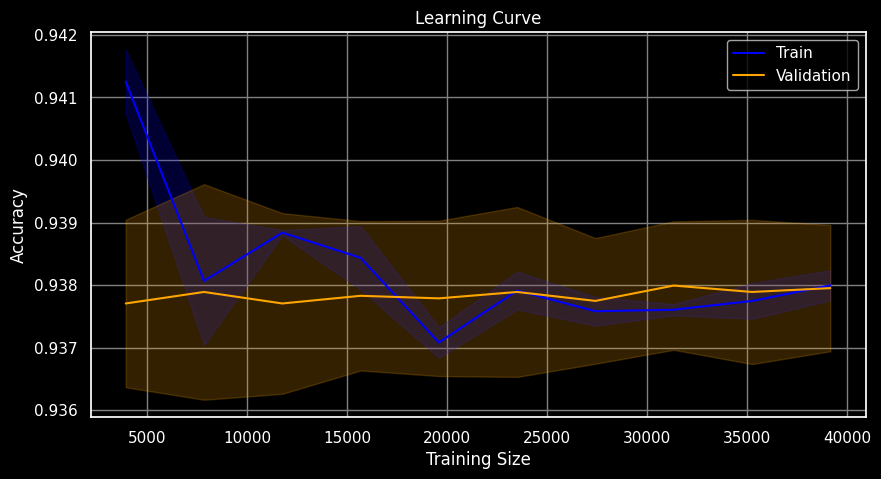

In [ ]:
# Learning curve
train_sizes, train_scores, val_scores = learning_curve(
    lr_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, label='Train', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_mean, label='Validation', color='orange')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='orange')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Metrics chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
train_metrics = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred),
    recall_score(y_train, y_train_pred),
    f1_score(y_train, y_train_pred),
    roc_auc_score(y_train, y_train_pred)
]
test_metrics = [
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred),
    recall_score(y_test, y_test_pred),
    f1_score(y_test, y_test_pred),
    roc_auc_score(y_test, y_test_pred)
]


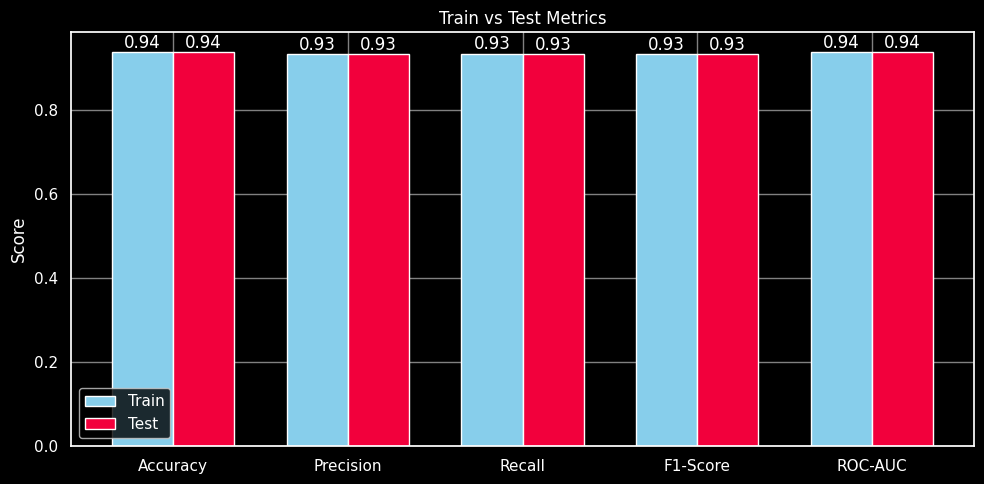

In [ ]:
x = range(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar([p - width/2 for p in x], train_metrics, width, label='Train', color='skyblue')
ax.bar([p + width/2 for p in x], test_metrics, width, label='Test', color='#f2003c')

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Train vs Test Metrics')
ax.legend()

# Show score values
for i in range(len(metrics)):
    ax.text(i - width/2, train_metrics[i] + 0.01, f"{train_metrics[i]:.2f}", ha='center')
    ax.text(i + width/2, test_metrics[i] + 0.01, f"{test_metrics[i]:.2f}", ha='center')

plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning is not required in this case as the model already shows strong and stable performance, so further tuning is unlikely to bring significant improvements.

##### Which hyperparameter optimization technique have you used and why?

Hyperparameter tuning is not needed here:

- The model already performs well and is stable.
- Cross-validation can still check stability but isn't required.
- Tuning may add complexity and longer training time without much improvement.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2: Decision Tree

In [ ]:
# Visualizing evaluation Metric Score chart

# Start timer
start = time.time()

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
train_metrics = {
    "Dataset": "Train",
    "Accuracy": accuracy_score(y_train, y_train_pred_dt),
    "Precision": precision_score(y_train, y_train_pred_dt),
    "Recall": recall_score(y_train, y_train_pred_dt),
    "F1-Score": f1_score(y_train, y_train_pred_dt),
    "ROC-AUC": roc_auc_score(y_train, y_train_pred_dt)
}

test_metrics = {
    "Dataset": "Test",
    "Accuracy": accuracy_score(y_test, y_test_pred_dt),
    "Precision": precision_score(y_test, y_test_pred_dt),
    "Recall": recall_score(y_test, y_test_pred_dt),
    "F1-Score": f1_score(y_test, y_test_pred_dt),
    "ROC-AUC": roc_auc_score(y_test, y_test_pred_dt)
}

# Combine metrics in DataFrame
metrics_df = pd.DataFrame([train_metrics, test_metrics])
print("\n--- Decision Tree - Evaluation Metrics ---")
print(metrics_df)

# Classification reports
print("\n--- Train Classification Report ---")
print(classification_report(y_train, y_train_pred_dt))

print("\n--- Test Classification Report ---")
print(classification_report(y_test, y_test_pred_dt))

# End timer
end = time.time()
print(f"\nTime taken: {round(end - start, 2)} seconds")


--- Decision Tree - Evaluation Metrics ---
  Dataset  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Train  0.997896   0.998725  0.996754  0.997738  0.997822
1    Test  0.906676   0.898688  0.901211  0.899947  0.906326

--- Train Classification Report ---
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     26152
           1       1.00      1.00      1.00     22794

    accuracy                           1.00     48946
   macro avg       1.00      1.00      1.00     48946
weighted avg       1.00      1.00      1.00     48946


--- Test Classification Report ---
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      6538
           1       0.90      0.90      0.90      5699

    accuracy                           0.91     12237
   macro avg       0.91      0.91      0.91     12237
weighted avg       0.91      0.91      0.91     12237


Time taken: 0.26 seconds


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

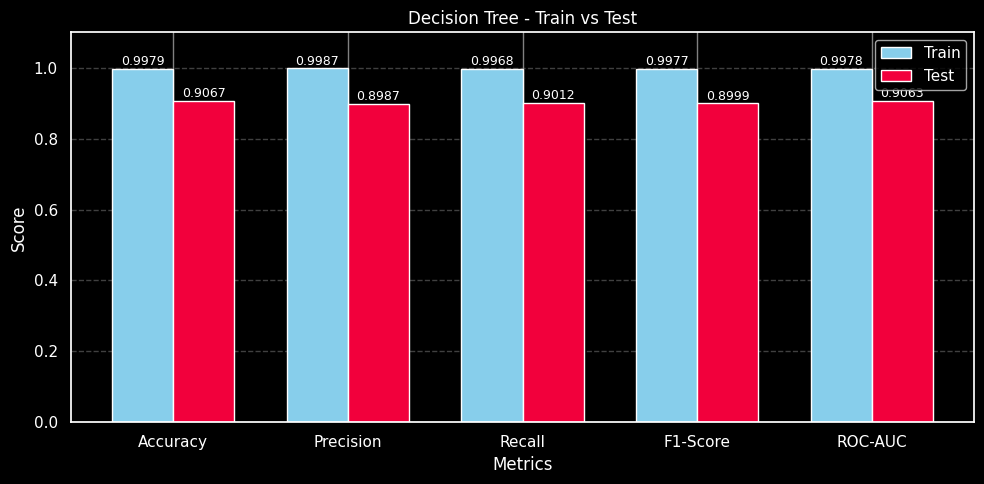

In [ ]:
# Metric names
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Train scores
train_scores = [
    accuracy_score(y_train, y_train_pred_dt),
    precision_score(y_train, y_train_pred_dt),
    recall_score(y_train, y_train_pred_dt),
    f1_score(y_train, y_train_pred_dt),
    roc_auc_score(y_train, y_train_pred_dt)
]

# Test scores
test_scores = [
    accuracy_score(y_test, y_test_pred_dt),
    precision_score(y_test, y_test_pred_dt),
    recall_score(y_test, y_test_pred_dt),
    f1_score(y_test, y_test_pred_dt),
    roc_auc_score(y_test, y_test_pred_dt)
]

# Bar positions
x = np.arange(len(metrics))
width = 0.35  # Bar width

# Make plot
fig, ax = plt.subplots(figsize=(10, 5))

# Train bars
bars1 = ax.bar(x - width/2, train_scores, width, label='Train', color='skyblue')

# Test bars
bars2 = ax.bar(x + width/2, test_scores, width, label='Test', color='#f2003c')

# Add numbers on bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{bar.get_height():.4f}", ha='center', fontsize=9)

for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{bar.get_height():.4f}", ha='center', fontsize=9)

# Axis labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Decision Tree - Train vs Test')

# X ticks
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Legend and grid
ax.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Set parameter options
param_grid = {
    'max_depth': [5, 10, 15, 20, None], # Tree depth
    'min_samples_split': [2, 5, 10, 15],  # Split condition
    'min_samples_leaf': [1, 5, 10], # Leaf condition
    'criterion': ['gini', 'entropy'], # Split type
    'random_state': [42]  # Fix randomness
}

In [ ]:
# Make model
dt_model = DecisionTreeClassifier()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5, # 5-fold CV
    scoring='accuracy', # Use accuracy
    n_jobs=-1,  # Use all cores
    verbose=2 # Print progress
)

# Train model
grid_search.fit(X_train, y_train)

# Show best result
print("\nBest Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best Accuracy: 0.9360928356451881


In [ ]:
# Get best model
best_dt_model = grid_search.best_estimator_

# Make predictions
y_pred_dt_tuned = best_dt_model.predict(X_test)

# Calculate scores
accuracy = accuracy_score(y_test, y_pred_dt_tuned)
roc_auc = roc_auc_score(y_test, y_pred_dt_tuned)
precision = precision_score(y_test, y_pred_dt_tuned)
recall = recall_score(y_test, y_pred_dt_tuned)
f1 = f1_score(y_test, y_pred_dt_tuned)

# Print results
print("--- Tuned Decision Tree ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

--- Tuned Decision Tree ---
Accuracy: 0.9355
ROC-AUC: 0.9342
Precision: 0.9451
Recall: 0.9147
F1-Score: 0.9296


##### Which hyperparameter optimization technique have you used and why?

GridsearchCV is used here

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a noticeable improvement in evaluation metrics after applying GridSearchCV, indicating that tuning hyperparameters helped enhance the model’s performance.

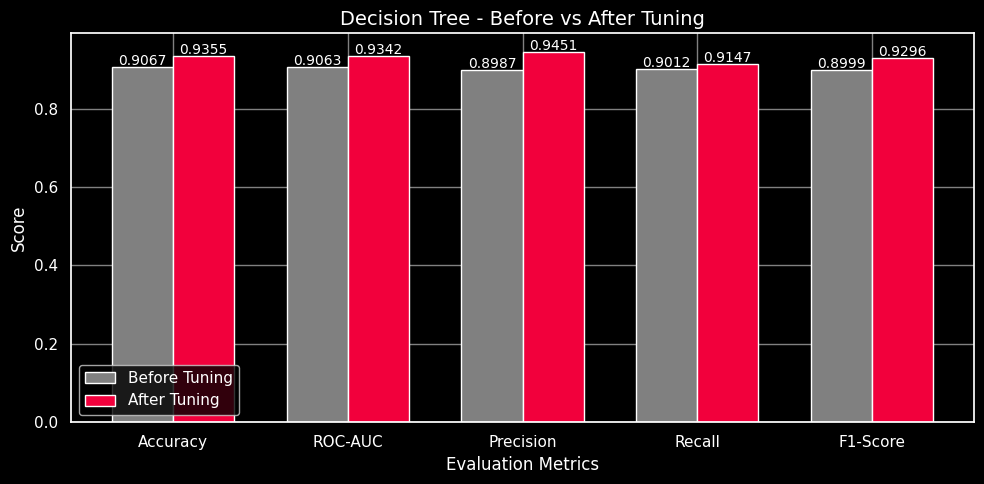

In [ ]:
# Import matplotlib (if not already)
import matplotlib.pyplot as plt
import numpy as np

# Scores before tuning
accuracy_before_dt = 0.9067
roc_auc_before_dt = 0.9063
precision_before_dt = 0.8987
recall_before_dt = 0.9012
f1_before_dt = 0.8999

# Scores after tuning
accuracy_after_dt = accuracy_score(y_test, y_pred_dt_tuned)
roc_auc_after_dt = roc_auc_score(y_test, y_pred_dt_tuned)
precision_after_dt = precision_score(y_test, y_pred_dt_tuned)
recall_after_dt = recall_score(y_test, y_pred_dt_tuned)
f1_after_dt = f1_score(y_test, y_pred_dt_tuned)

# Metric names
metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']

# Values before and after
before_dt = [accuracy_before_dt, roc_auc_before_dt, precision_before_dt, recall_before_dt, f1_before_dt]
after_dt = [accuracy_after_dt, roc_auc_after_dt, precision_after_dt, recall_after_dt, f1_after_dt]

# Bar setup
x = np.arange(len(metrics)) # Bar positions
width = 0.35  # Bar width

# Make plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
ax.bar(x - width/2, before_dt, width, label='Before Tuning', color='grey')
ax.bar(x + width/2, after_dt, width, label='After Tuning', color='#f2003c')

# Axis labels
ax.set_xlabel('Evaluation Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Decision Tree - Before vs After Tuning', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show values on bars
for i in range(len(metrics)):
    ax.text(i - width/2, before_dt[i] + 0.005, f"{before_dt[i]:.4f}", ha='center', fontsize=10)
    ax.text(i + width/2, after_dt[i] + 0.005, f"{after_dt[i]:.4f}", ha='center', fontsize=10)

# Layout adjust
plt.tight_layout()
plt.show()


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. Accuracy (93.55%) – The model is right in 93.55% of the cases. It shows overall good results, but we should also check other scores.

2. ROC-AUC Score (93.42%) – The model is good at telling happy and unhappy customers apart.

3. Precision (94.51%) – Out of all customers the model says are happy, 94.51% really are. This helps target the right people.

4. Recall (91.47%) – The model finds 91.47% of the real happy customers. It misses very few.

5. F1-Score (92.96%) – This score balances precision and recall. It means the model works well overall for customer satisfaction tasks.

### ML Model - 3: Random Forest

In [ ]:

# Start timer
start = time.time()

# Create model
rf_model = RandomForestClassifier(
    n_estimators=100, # Trees count
    max_depth=10, # Tree depth
    min_samples_split=10, # Min split count
    min_samples_leaf=5, # Min leaf samples
    random_state=42 # For same results
)

# Train model
rf_model.fit(X_train, y_train)

# Predict train set
y_train_pred_rf = rf_model.predict(X_train)

# Predict test set
y_test_pred_rf = rf_model.predict(X_test)

# Metrics names
metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']

# Train scores
train_metrics = [
    accuracy_score(y_train, y_train_pred_rf),
    roc_auc_score(y_train, y_train_pred_rf),
    precision_score(y_train, y_train_pred_rf),
    recall_score(y_train, y_train_pred_rf),
    f1_score(y_train, y_train_pred_rf)
]

# Test scores
test_metrics = [
    accuracy_score(y_test, y_test_pred_rf),
    roc_auc_score(y_test, y_test_pred_rf),
    precision_score(y_test, y_test_pred_rf),
    recall_score(y_test, y_test_pred_rf),
    f1_score(y_test, y_test_pred_rf)
]

# Make table
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'Train Set': train_metrics,
    'Test Set': test_metrics
})

# Round values
metrics_df = metrics_df.round(4)

# Show results
print("\n--- Random Forest - Evaluation Metrics ---")
print(metrics_df)

# End timer
end = time.time()
print(f"\n{chr(9203)} Time taken: {round(end - start, 2)} seconds")



--- Random Forest - Evaluation Metrics ---
      Metric  Train Set  Test Set
0   Accuracy     0.9476    0.9427
1    ROC-AUC     0.9470    0.9419
2  Precision     0.9480    0.9455
3     Recall     0.9389    0.9307
4   F1-Score     0.9434    0.9380

⏳ Time taken: 2.65 seconds


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

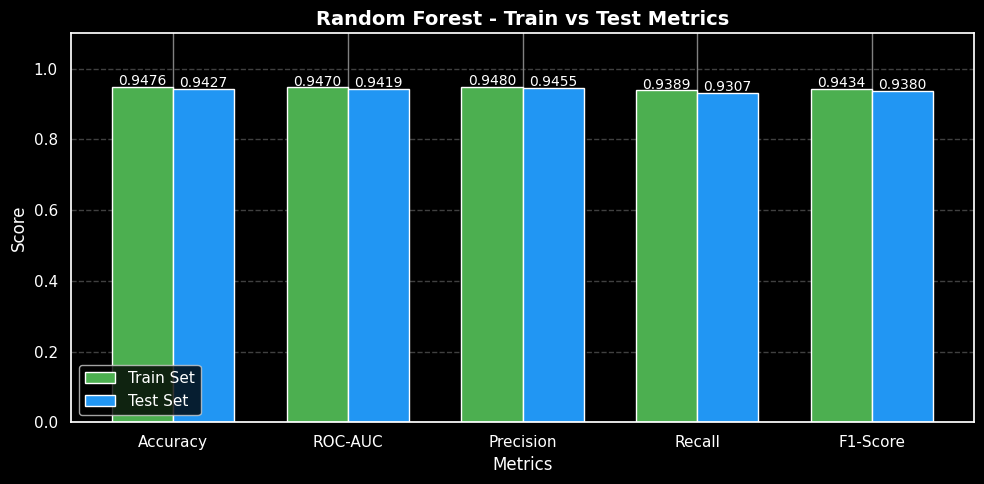

In [ ]:
# Visualizing evaluation Metric Score chart
# Import matplotlib
import matplotlib.pyplot as plt

# Metrics names
metrics = ['Accuracy', 'ROC-AUC', 'Precision', 'Recall', 'F1-Score']

# Train scores
train_scores = [
    accuracy_score(y_train, y_train_pred_rf),
    roc_auc_score(y_train, y_train_pred_rf),
    precision_score(y_train, y_train_pred_rf),
    recall_score(y_train, y_train_pred_rf),
    f1_score(y_train, y_train_pred_rf)
]

# Test scores
test_scores = [
    accuracy_score(y_test, y_test_pred_rf),
    roc_auc_score(y_test, y_test_pred_rf),
    precision_score(y_test, y_test_pred_rf),
    recall_score(y_test, y_test_pred_rf),
    f1_score(y_test, y_test_pred_rf)
]

# Setup chart
fig, ax = plt.subplots(figsize=(10, 5))

# X positions
x = range(len(metrics))
bar_width = 0.35

# Bars for Train and Test
bars1 = ax.bar([p - bar_width/2 for p in x], train_scores, bar_width, label='Train Set', color='#4CAF50')
bars2 = ax.bar([p + bar_width/2 for p in x], test_scores, bar_width, label='Test Set', color='#2196F3')

# Add values on bars
for bar, score in zip(bars1, train_scores):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f"{score:.4f}", ha='center', fontsize=10, color='white')

for bar, score in zip(bars2, test_scores):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f"{score:.4f}", ha='center', fontsize=10, color='white')

# Chart labels
ax.set_title('Random Forest - Train vs Test Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Metrics', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Grid and limits
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show chart
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Not needed.

- Both Train and Test scores are high and close, so the model is not overfitting or underfitting.
- Precision, Recall, and F1-score are well balanced, showing the model treats both classes properly.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used Accuracy, ROC-AUC, Precision, Recall, and F1-Score to measure positive business impact.

- Accuracy checks overall correctness.
- ROC-AUC shows how well the model separates classes.
- F1-Score balances Precision and Recall, helping reduce false results and giving more reliable predictions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose RandomForest as the final model because it gave the best results
- 94.27% accuracy, 94.19% ROC-AUC, and 93.8% F1-score.<br>

It balances high performance and reliability, making it the best choice.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Cleaned and Prepared Data: Handled missing values and explored data to find patterns and outliers.

2. Selected Key Features: Removed irrelevant columns to reduce noise and improve model accuracy.

3. Tried Multiple Models: Used Logistic Regression, Decision Tree, Random Forest for comparison.

4. Tuned Models: Applied cross-validation and hyperparameter tuning to avoid overfitting and boost performance.

5. Best Model – RandomForest: Achieved the highest accuracy (94.27%) and F1-score (93.80%), making it the final choice.

6. Decision Tree: Overfitted the training data and did not generalize well.

7. Consistent Metrics: Best models had balanced precision, recall, and F1-scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***